# Working with matplotlib

## Plotting functions

Create a numpy array with a linear space between 1 and 200 that will serve as x axis. Then, create a new array with random values using a normal distribution around 180. And then, creat another one with a normal distribution around 170. 

Plot both of them and add a legend at the upper right part of the figure that explain what they are. Make the second line appear with dashed line in red. 

Finally, save it as PNG. 

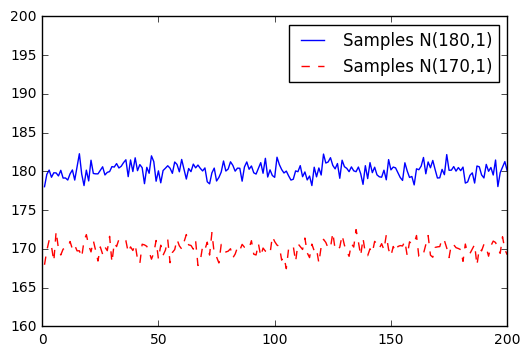

In [55]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(1, 200, 200)

#Creación de arrays en torno a medias distintas
#sigma * np.random.randn(...) + mu
mu1 = 180
mu2 = 170

y1 = np.random.randn(200) + mu1
y2 = np.random.randn(200) + mu2

#Plot de ambos arrays
plt.plot(x, y1, label="Samples N(180,1)")
#La segunda línea con guiones y en rojo
plt.plot(x, y2, "--", color="r", label="Samples N(170,1)")

#Ajuste de ejes
axes = plt.gca()
axes.set_ylim([160,200])

#Leyenda
plt.legend(loc='upper right')

#Referencias
#http://stackoverflow.com/questions/3777861/setting-y-axis-limit-in-matplotlib
#http://matplotlib.org/1.3.0/examples/pylab_examples/legend_demo.html

## Plotting distributions

Take the two distributions above, and plot their histograms in the same figure, using 80 intervals for the first, and 90 for the second. 

(0, 15)

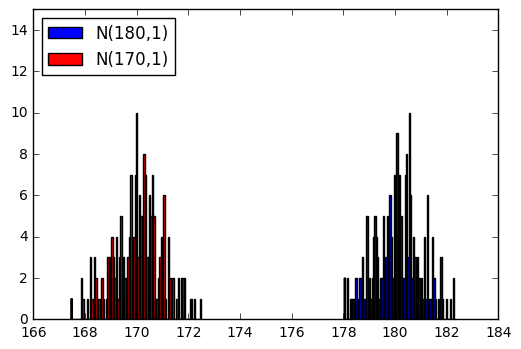

In [56]:
_ = plt.hist(y1, bins=80, label="N(180,1)")
_ = plt.hist(y2, bins=90, color="r", label="N(170,1)")

plt.legend(loc='upper left')

axes = plt.gca()
axes.set_ylim([0,15])

#http://matplotlib.org/api/pyplot_api.html

## Annotating

You can use text or annotations (text with arrows pointing to particular parts of the figure). Plot again the one of the arrays above and try to annotate pointing to the highest value. You can use <code>argmax</code>. 

Máximo número de muestras: 10.0


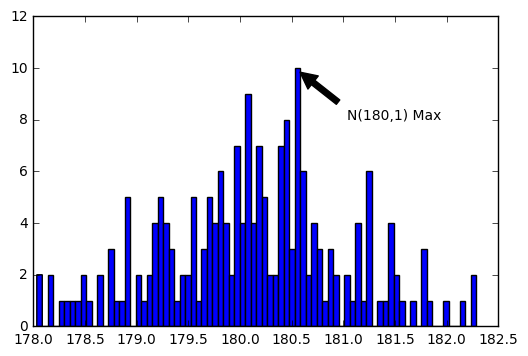

In [64]:
#Dependiendo de la ejecución uno u otro obtendrán el mayor número de muestras. Calculamos el índice de la muestra donde hacer
#la anotación

(n1, bins1, _) = plt.hist(y1, bins=80)

#Número máximo de muestras
print("Máximo número de muestras: " + str(n1.max()))
axes = plt.gca()
axes.set_ylim([0,n1.max() + 2])

#print(bins1.max())

#Bin (x) correspondiente al maximo
nMax = np.argmax(n1)
binMax = bins1[nMax]

t = plt.annotate('N(180,1) Max', xy=(binMax, n1.max()), xytext=(binMax + 0.5, 8),
        arrowprops=dict(facecolor='black', shrink=0.1),
    )
#t.set_fontsize(12)

#http://stackoverflow.com/questions/15558136/obtain-the-max-y-value-of-a-histogram

## Locators - ticks

Let's now simulate stock values in a period of time. Generate 100 stock values and use as x axis a major locator with a range of dates. Check if they display nicely. If not, look for <code>DateFormatter</code> and the <code>set_major_formatter</code> function to fix it and make it shorter. You will need to get the xaxis of the line to set the new formatter.

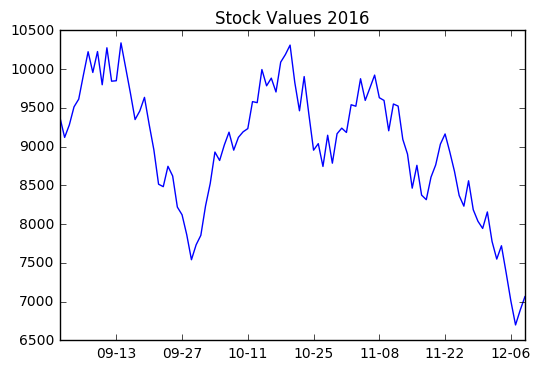

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange

# Example of datetime use:
from datetime import datetime 
start = datetime(2016, 9, 1)
#end = datetime(2014, 6, 30)
#interval = end - start
#print(interval) 180 days, 0:00:00

# Generate a list of dates:
max_t = 100
dates = pd.date_range(start, periods = max_t)
#print(dates)

#Cálculo del array de cotizaciones (Ejercicios bloques 3-4)
#Cotización inicial
cotInicial = 9378.1
#Máxima variación (5%)
delta = 0.05

cotizaciones = [cotInicial]

#Se añaden las cotizaciones al vector
for i in range(1, max_t):
    sube_baja = np.random.randint(0, 2)              # 0:baja acción; 1: sube acción
    variacion = np.random.uniform(low=0, high=delta) # variación aleatoria hasta un cierto máximo
    if sube_baja == 0:
        cotizaciones.append(round(cotizaciones[i-1] * (1 - variacion), 2))
    else:
        cotizaciones.append(round(cotizaciones[i-1] * (1 + variacion), 2))

stockValues = pd.Series(cotizaciones, index = dates)

#plt.plot(stockValues)

# Change the display:
fig, ax = plt.subplots()
#ax.plot_date(dates, stockValues)
ax.plot(dates, stockValues)

# this is superfluous, since the autoscaler should get it right, but
# use date2num and num2date to convert between dates and floats if
# you want; both date2num and num2date convert an instance or sequence
ax.set_xlim(dates[0], dates[-1])

#ax.xaxis.set_major_locator(DayLocator())
#Dejo solo mes día
ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
plt.title("Stock Values 2016")
#ax.fmt_xdata = DateFormatter('%Y-%m-%d %H:%M:%S')
#Pone las fechas en diagonal
#fig.autofmt_xdate()

#plt.show()

#Múltiples configuraciones. Revisar:
#http://matplotlib.org/examples/pylab_examples/date_demo_convert.html

## Multiple subplots

Create a figure with four subplots distributed in two rows. Then create two NumPy arrays of the same size with random numbers. The first representing the ages of retired people in a population, and the second their monthly income in thousand dollars. Plot in different subplots:
* The historgrams of ages (second row).
* The histogram of salaries (second row).
* An scatterplot ages versus salaries.


## Plotting DataFrames

Get the churn dataset again and load into a DataFrame the columns Day Mins, Day Calls, Day Charge and Churn. 

In [3]:
from urllib import urlretrieve
link = 'https://raw.githubusercontent.com/EricChiang/churn/master/data/churn.csv'
urlretrieve(link, "churn.txt")

('churn.txt', <httplib.HTTPMessage instance at 0x7fc198391128>)

In [4]:
import pandas as pd
#df = pd.read_csv("churn.txt", 
#                 usecols=[...])



Now, using subplots plot the three numerical columns, first in a single plot, then in different subplots.

Split the data in two groups according to the value of Churn, and plot  the Day Charge for each of the two groups in the same plot with a legend.

In [5]:
bychurn = df.groupby("Churn?")
#...

NameError: name 'df' is not defined

Now plot the histograms of Day Charge for each of the groups.